In [1]:
import pandas as pd

In [2]:
pwd

'c:\\Users\\berk_\\OneDrive\\JWorkspace\\cihan\\ml_calismasi\\notebook'

In [3]:
df = pd.read_excel("../data/finned tube yeni (Otomatik kaydedildi).xlsx")

In [4]:
df = df.ffill()
df = df.iloc[:,:5]
df.columns = ['Re', 'Vin_air', 'T_in_water', 'T_in_air', "T_out_water"]

In [5]:
df.head()

,Re,Vin_air,T_in_water,T_in_air,T_out_water
0,50.0,1,338.0,293.0,315.39000
1,50.0,2,338.0,293.0,310.54000
2,50.0,3,338.0,293.0,308.15863
3,50.0,4,338.0,293.0,306.73000
4,50.0,1,338.0,296.5,317.11000


In [6]:
X = df.iloc[:,[0, 1, 3]]
y = df.iloc[:,-1]

In [27]:
X.head()

,Re,Vin_air,T_in_air
0,50.0,1,293.0
1,50.0,2,293.0
2,50.0,3,293.0
3,50.0,4,293.0
4,50.0,1,296.5


In [7]:
from sklearn import neural_network, preprocessing, model_selection, metrics, pipeline, compose, neighbors, linear_model

In [8]:
class LocallyWeightedRegressor(neighbors.KNeighborsRegressor):
    def __init__(self, n_neighbors=2, gamma=None):
        super().__init__(n_neighbors=n_neighbors)
        if gamma is None:
            gamma = 1.0
        self.gamma = gamma

    def predict(self, X):
        y_preds = []
        dist, inds = self.kneighbors(X)
        for i in range(X.shape[0]):
            model_ftp = linear_model.LinearRegression()
            weights = np.exp(-self.gamma * dist[i])
            model_ftp.fit(self._fit_X[inds[i]], self._y[inds[i]], sample_weight=weights)
            y_preds.append(model_ftp.predict(X[i:i+1]))
        res = np.array(y_preds).squeeze()
        if res.ndim == 0:
            res = res.reshape(-1, 1)
        return res

In [85]:
coremodel = neural_network.MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=100000, random_state=42)
# coremodel = LocallyWeightedRegressor(n_neighbors=10, gamma=0.7)
model = compose.TransformedTargetRegressor(regressor=coremodel, transformer=preprocessing.StandardScaler())
boru = pipeline.Pipeline(
    steps=[
        ("preprocess", preprocessing.StandardScaler()),
        ("model", model)
    ]
)

In [86]:
test_yontem = model_selection.KFold(n_splits=6, shuffle=True, random_state=42)

In [87]:
sonuc = model_selection.cross_validate(boru, X, y, cv=test_yontem, scoring=["neg_mean_absolute_error", "r2"], return_estimator=True)

In [88]:
pd.DataFrame(sonuc)

,fit_time,score_time,estimator,test_neg_mean_absolute_error,test_r2
0,0.064827,0.002991,"(StandardScaler(), TransformedTargetRegressor(...",-0.511094,0.988024
1,0.065342,0.001995,"(StandardScaler(), TransformedTargetRegressor(...",-0.480363,0.990437
2,0.063344,0.002992,"(StandardScaler(), TransformedTargetRegressor(...",-0.516118,0.983889
3,0.109535,0.001382,"(StandardScaler(), TransformedTargetRegressor(...",-0.312974,0.992674
4,0.062960,0.001995,"(StandardScaler(), TransformedTargetRegressor(...",-0.537361,0.984533
5,0.055365,0.002990,"(StandardScaler(), TransformedTargetRegressor(...",-0.465394,0.985364


In [89]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
boru.fit(X_train, y_train)

Pipeline(steps=[('preprocess', StandardScaler()),
                ('model',
                 TransformedTargetRegressor(regressor=MLPRegressor(hidden_layer_sizes=(100,
                                                                                       100),
                                                                   max_iter=100000,
                                                                   random_state=42),
                                            transformer=StandardScaler()))])

In [91]:
df.head()

,Re,Vin_air,T_in_water,T_in_air,T_out_water
0,50.0,1,338.0,293.0,315.39000
1,50.0,2,338.0,293.0,310.54000
2,50.0,3,338.0,293.0,308.15863
3,50.0,4,338.0,293.0,306.73000
4,50.0,1,338.0,296.5,317.11000


In [92]:
boru.predict(X_test)

array([314.71152419, 312.40716095, 328.95447593, 327.49428148,
       317.7698041 , 325.73783351, 325.82359403, 330.35354126,
       321.73999911, 328.866624  , 325.48092476, 325.36669647])

<AxesSubplot:>

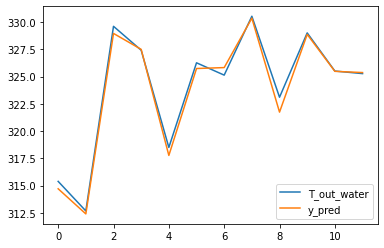

In [93]:
y_test.to_frame().assign(y_pred=boru.predict(X_test)).reset_index(drop=True).plot()

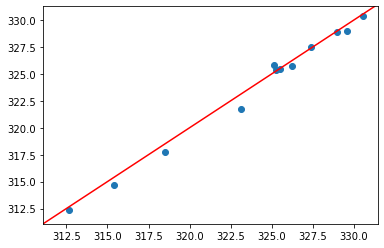

In [99]:
plt.scatter(y_test, boru.predict(X_test))
plt.axline([312,312], slope=1, color="red")

In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
m = np.linspace(30, 250, 100)
ty = boru.predict([[i, 1, 300] for i in m])
tx = [i for i in m]

c:\Users\berk_\miniconda3\envs\cons1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
df.describe()

,Re,Vin_air,T_in_water,T_in_air,T_out_water
count,60.000000,60.000000,60.0,60.000000,60.000000
mean,150.000000,2.500000,338.0,296.500000,321.747499
std,71.307403,1.127469,0.0,2.881854,6.277248
min,50.000000,1.000000,338.0,293.000000,306.730000
25%,100.000000,1.750000,338.0,293.000000,317.858035
50%,150.000000,2.500000,338.0,296.500000,323.082950
75%,200.000000,3.250000,338.0,300.000000,326.307142
max,250.000000,4.000000,338.0,300.000000,331.692620


Text(0, 0.5, 'T_out_water')

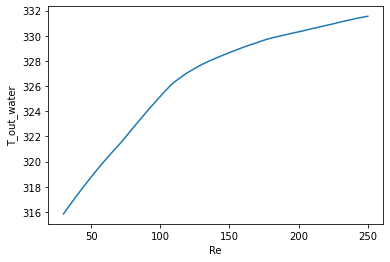

In [19]:
plt.plot(tx, ty)
plt.xlabel("Re")
plt.ylabel("T_out_water")

In [20]:
from typing import Callable, Iterable
def bipropellant_maker(params: Iterable) -> Callable: 
    """Return a bipropellant_maker function using designated parameters.""" 
    def bipropellant_rocket_pid_solution(delta_t, current_velocity, optimal_velocity, data): 
        error = - optimal_velocity + current_velocity 
        tp1 = params[0] 
        td1 = params[1] 
        ti1 = params[2]  

        if 'optimal_prev' not in data: 
            data['optimal_prev'] = optimal_velocity 

        if optimal_velocity != data['optimal_prev']: 
            data['optimal_prev'] = optimal_velocity 
            data['ErrorD'] = 0.0 
            data['ErrorI'] = 0.0 

        temporal_diff = (error - data['ErrorD']) / delta_t 
        data['ErrorD'] = error 
        data['ErrorI'] += error 

        integral_err = data['ErrorI'] 
        fuel_throttle = -tp1 * error - td1 * temporal_diff - ti1 * integral_err 

        return fuel_throttle, data 

    return bipropellant_rocket_pid_solution 

In [21]:
df.head()

,Re,Vin_air,T_in_water,T_in_air,T_out_water
0,50.0,1,338.0,293.0,315.39000
1,50.0,2,338.0,293.0,310.54000
2,50.0,3,338.0,293.0,308.15863
3,50.0,4,338.0,293.0,306.73000
4,50.0,1,338.0,296.5,317.11000


In [22]:
X_test.assign(T_out_water=y_test)

,Re,Vin_air,T_in_air,T_out_water
0,50.0,1,293.0,315.39000
5,50.0,2,296.5,312.68000
36,200.0,1,293.0,329.60836
45,200.0,2,300.0,327.41604
13,100.0,2,293.0,318.50155
54,250.0,3,296.5,326.26240


In [23]:
params = [2, 0.1, 0.1]
semih = bipropellant_maker(params)
Re = 80
Vin_air = 1.0
T_in_air = 293.0
T_in_water = 338
T_out_water = 315.39000
current = boru.predict(pd.DataFrame([[Re, Vin_air, T_in_air]], columns=X.columns))[0]
data = {"ErrorD": 0, "ErrorI": 0}
Res = [Re]
Currents = []
delta_t = .5
for i in range(1000):
    throttle, data = semih(delta_t, current, T_out_water, data)
    Re += throttle
    current = boru.predict(pd.DataFrame([[Re, Vin_air, T_in_air]], columns=X.columns))[0]
    Res.append(Re)
    Currents.append(current)
    # print(Re, current)


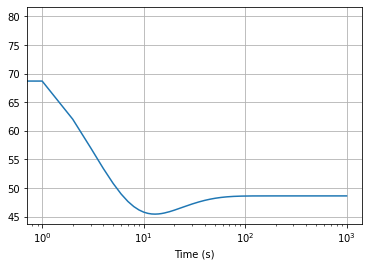

In [24]:
t = np.linspace(0, 1000*delta_t, 1001)
plt.plot(Res)
# plt.axhline(T_out_water, color="red")
plt.semilogx()
plt.grid()
plt.xlabel("Time (s)");

In [309]:
df.style.background_gradient()

,Re,Vin_air,T_in_water,T_in_air,T_out_water
0,50.000000,1,338.000000,293.000000,315.390000
1,50.000000,2,338.000000,293.000000,310.540000
2,50.000000,3,338.000000,293.000000,308.158630
3,50.000000,4,338.000000,293.000000,306.730000
4,50.000000,1,338.000000,296.500000,317.110000
5,50.000000,2,338.000000,296.500000,312.680000
6,50.000000,3,338.000000,296.500000,310.477600
7,50.000000,4,338.000000,296.500000,309.160000
8,50.000000,1,338.000000,300.000000,318.871730
9,50.000000,2,338.000000,300.000000,314.810630


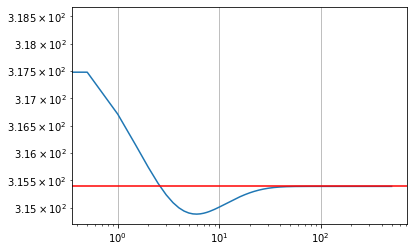

In [25]:
plt.plot( t[:-1], Currents,)
plt.axhline(T_out_water, color="red")
plt.semilogy()
plt.semilogx()
plt.grid()